# Find 2 overlapping tiles and convert them 

In [1]:
#unpickle the geodataframe

In [2]:
import pickle
gdf = pickle.load( open( "overlapping_tiles.pickle", "rb" ) )
gdf

,Name,Description,geometry
16984,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
17893,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


# Search HLS1.5 for images

In [3]:
import os

import requests as r

# Authentication stuff I borrowed from others - Logan, Cole ...

In [4]:
# AUTHENTICATION CONFIGURATION
from netrc import netrc
from subprocess import Popen
from getpass import getpass

urs = 'urs.earthdata.nasa.gov'    # Earthdata URL to call for authentication
prompts = ['Enter NASA Earthdata Login Username \n(or create an account at urs.earthdata.nasa.gov): ',
           'Enter NASA Earthdata Login Password: ']

# Determine if netrc file exists, and if so, if it includes NASA Earthdata Login Credentials
try:
    netrcDir = os.path.expanduser("~/.netrc")
    netrc(netrcDir).authenticators(urs)[0]
    del netrcDir

# Below, create a netrc file and prompt user for NASA Earthdata Login Username and Password
except FileNotFoundError:
    homeDir = os.path.expanduser("~")
    Popen('touch {0}.netrc | chmod og-rw {0}.netrc | echo machine {1} >> {0}.netrc'.format(homeDir + os.sep, urs), shell=True)
    Popen('echo login {} >> {}.netrc'.format(getpass(prompt=prompts[0]), homeDir + os.sep), shell=True)
    Popen('echo password {} >> {}.netrc'.format(getpass(prompt=prompts[1]), homeDir + os.sep), shell=True)
    del homeDir

# Determine OS and edit netrc file if it exists but is not set up for NASA Earthdata Login
except TypeError:
    homeDir = os.path.expanduser("~")
    Popen('echo machine {1} >> {0}.netrc'.format(homeDir + os.sep, urs), shell=True)
    Popen('echo login {} >> {}.netrc'.format(getpass(prompt=prompts[0]), homeDir + os.sep), shell=True)
    Popen('echo password {} >> {}.netrc'.format(getpass(prompt=prompts[1]), homeDir + os.sep), shell=True)
    del homeDir
del urs, prompts

# practice a random search 100 items

In [5]:
stac = 'https://cmr.earthdata.nasa.gov/stac/' # CMR-STAC API Endpoint
stac_response = r.get(stac).json()            # Call the STAC API endpoint
stac_lp = [s for s in stac_response['links'] if 'LP' in s['title']]  
lp_cloud = r.get([s for s in stac_lp if s['title'] == 'LPCLOUD'][0]['href']).json()
lp_links = lp_cloud['links']

In [6]:
lp_search = [l['href'] for l in lp_links if l['rel'] == 'search'][0]  # Define the search endpoint
search_response = r.get(f"{lp_search}").json()                        # Send GET request to retrieve items
lim = 100
search_query = f"{lp_search}?&limit={lim}"    # Add in a limit parameter to retrieve 100 items at a time.
search_response = r.get(search_query).json()  # send GET request to retrieve first 100 items in the STAC collection

print(f"{len(search_response['features'])} items found!")

100 items found!


In [7]:
my_hls = search_response['features']

type(my_hls)

list

# look at metadata item zero

In [8]:
my_hls[0]

{'type': 'Feature',
 'id': 'G1969487860-LPCLOUD',
 'stac_version': '1.0.0-beta.1',
 'stac_extensions': ['eo'],
 'collection': 'C1711924822-LPCLOUD',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-119.1488671, 33.3327671],
    [-118.9832795, 33.3355226],
    [-118.6783731, 34.3301598],
    [-119.1737801, 34.3223655],
    [-119.1488671, 33.3327671]]]},
 'bbox': [-119.17378, 33.332767, -118.678373, 34.33016],
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD/items/G1969487860-LPCLOUD'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD'},
  {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'},
  {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'},
  {'rel': 'via',
   'href': 'https://cmr.earthdata.nasa.gov/search/c

# Display the browse item zero



In [9]:
my_hls[0]['assets']['browse']

{'name': 'Download HLS.S30.T11SLT.2015238T185436.v1.5.jpg',
 'href': 'https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.jpg',
 'type': 'image/jpeg'}

In [10]:
browse_jpg = my_hls[0]['assets']['browse']['href']
browse_jpg

'https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.jpg'

In [11]:
from IPython.display import Image
Image(url=browse_jpg) 

# ok get a tile now from october 

In [12]:
gdf

,Name,Description,geometry
16984,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
17893,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


In [13]:
gdf.reset_index(inplace=True, drop=True)

In [14]:
gdf

,Name,Description,geometry
0,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
1,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


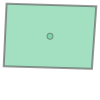

In [15]:
gdf['geometry'][0]

# test search by bounds

In [16]:
gdf['geometry'][0].bounds

(-72.4612931365, 44.9975876117, -71.0006794401, 46.0243650752)

In [17]:
bounds = gdf['geometry'][0].bounds

In [18]:
bbox = f'{bounds[0]},{bounds[1]},{bounds[2]},{bounds[3]}'  # Defined from ROI bounds

In [19]:
search_query2 = f"{search_query}&bbox={bbox}"  # Add bbox to query
search_response = r.get(search_query2).json()                                                          # Send request
print(f"{len(search_response['features'])} items found!")

100 items found!


# Refine by date october 2020 - less cloudy perhaps?

In [20]:
date_time = "2020-10-01T00:00:00Z/2020-10-31T23:31:12Z"  # Define start time period / end time period
search_query3 = f"{search_query2}&datetime={date_time}"  # Add to query that already includes bounding_box
search_response = r.get(search_query3).json()            
print(f"{len(search_response['features'])} items found!")

56 items found!


In [21]:
#search_response

In [22]:
my_fav_tile = gdf['Name'][0]
my_fav_tile

'18TYR'

In [23]:
browse_list=[]
for item in search_response['features']:
    browse_url = item['assets']['browse']['href']
    if my_fav_tile in browse_url:
        print (browse_url)
        browse_list.append(browse_url)

https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020278T154121.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020283T154059.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020286T155119.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020288T154231.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020291T155251.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020298T154331.v1.5.jpg
https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020301T155341.v1.5.jpg


In [24]:
for jpg in browse_list:
    display(Image(url=jpg))

# cool metadata is here 
https://cmr.earthdata.nasa.gov/search/concepts/G1969487860-LPCLOUD.umm_json

In [25]:
! wget https://cmr.earthdata.nasa.gov/search/concepts/G1969487860-LPCLOUD.umm_json

--2021-02-28 17:35:07--  https://cmr.earthdata.nasa.gov/search/concepts/G1969487860-LPCLOUD.umm_json
Resolving cmr.earthdata.nasa.gov (cmr.earthdata.nasa.gov)... 54.230.126.42, 54.230.126.93, 54.230.126.52, ...
Connecting to cmr.earthdata.nasa.gov (cmr.earthdata.nasa.gov)|54.230.126.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7840 (7.7K) [application/vnd.nasa.cmr.umm+json]
Saving to: ‘G1969487860-LPCLOUD.umm_json.4’

G1969487860-LPCLOUD 100%[===================>]   7.66K  --.-KB/s    in 0s      

2021-02-28 17:35:07 (828 MB/s) - ‘G1969487860-LPCLOUD.umm_json.4’ saved [7840/7840]



In [26]:
import json
filename='G1969487860-LPCLOUD.umm_json'

import json

with open(filename) as f:
    my_meta = json.load(f)

In [27]:
my_meta

{'RelatedUrls': [{'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.VZA.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T11SLT.2015238T185436.v1.5.VZA.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.VAA.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T11SLT.2015238T185436.v1.5.VAA.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.SAA.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T11SLT.2015238T185436.v1.5.SAA.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.B11.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T11SLT.2015238T185436.v1.5.B11.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T11SLT.2015238T185436.v1.5.B02.tif',
  

In [28]:
#search_response

In [29]:
import pandas as pd
df = pd.DataFrame(my_meta['AdditionalAttributes'])

In [30]:
df

,Name,Values
0,PRODUCT_URI,[S2A_MSIL1C_20150826T185436_N0204_R070_T11SLT_...
1,CLOUD_COVERAGE,[6]
2,MGRS_TILE_ID,[11SLT]
3,SPATIAL_COVERAGE,[27]
4,SPATIAL_RESOLUTION,[30]
5,HLS_PROCESSING_TIME,[2020-11-21T16:11:05Z]
6,SENSING_TIME,[2015-08-26T18:54:35.457Z]
7,HORIZONTAL_CS_CODE,[EPSG:32611]
8,HORIZONTAL_CS_NAME,[WGS84 / UTM zone 11N]
9,ULX,[300000.0]
